<a href="https://colab.research.google.com/github/JohnKang0720/FIFA/blob/main/STAT_201_Project_(FIFA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

# **Statistical Inference regarding Performance/Statistics of Soccer players.**

**Members**: John Kang, Pedro Moretzshon Aaron Wang, Briana Pavey (Group 30)

# 1. Introduction

Statistical inference on athletes regarding their in-game stats happen on a daily basis by sport statisticians and is a significant factor that improves the quality of their performances through discovery of certain patterns and weaknesses with data analysis. For this report, we want to find a specific pattern that could possibly create a positive effect towards sport teams.

For a long time, there has been a debate whether or not left-footed players are more offensively skilled than right-footed players. To settle this, we will use statistical inference. Specifically, we will be using statistical inference methods to see the behavioral patterns of FIFA athletes: Does the preferred foot of attacking players affect dribbling, passing and shooting skills?

The dataset for this report is a FIFA 2017 Dataset from Kaggle -- a reliable dataset company -- consisting of 17,000 players along with 50+ attributes such as their overall ratings, personal information (names, age) and their associated team in the Fifa League.
We will be using the following columns:



*   ```preferred_foot```: Preferred foot of the player (left or right).
*   ```skill_dribbling```: Dribbling rating/How good the player dribbles.
*   ```passing```: Pass rating/How good the player passes.
*   ```skill_fk_accuracy```: Shooting accuracy.

This report will calculate the **mean differences** of the response variables: ```skill_dribbling```, ```passing```, ```skill_fk_accuracy``` as well as the **standard deviation** to see if the effect of ```preferred_foot``` is statistically significant. We chose to use the mean and standard deviation because the plots below are approximately normally distributed with almost no outliers. Hence, mean and SD would be accurate measures of center and spread respectively. We are only focusing on offensive players as they are more likely to have all three of the above statistics, whereas a goal-keeper or defender would not have any shooting stats.

We will also explore other statistics like quantiles and variances of the variables between left-foot and right-foot attackers to explore the spread of the bootstrap distributions (See Preliminary Results for this exploration).

**Method of Test:** We will use the ```infer``` package (to generate null distributions for each response variables and calculate the p-values) to conduct hypothesis test FOR EACH OF THE VARIABLES (```passing```, ```skill_dribbling```, and ```skill_fk_accuracy```) with the null hypothesis (H0) being that
```preferred_foot```
has no effect on performance and the alternative hypothesis (H1) being that there IS an effect. Hence, we are using the two-sample t-test to compare the mean differences of ```passing```, ```skill_dribbling```, and ```skill_fk_accuracy``` between 2 groups and calculate the p-value using the t-distribution.

$$H_0: \mu_1 - \mu_2 = 0$$ $$vs$$ $$H_1: \mu_1 - \mu_2 \neq 0$$,
where $\mu_1$: mean of EACH of the ```passing```, ```skill_dribbling```, and ```skill_fk_accuracy``` for right-footed attackers and  $\mu_2$: mean of each skills of the left-footed attackers.
The same hypothesis test will also be conducted for the SCALE parameter -- standard deviation.

$$H_0: \sigma_1 - \sigma_2 = 0$$ $$vs$$ $$H_1: \sigma_1 - \sigma_2 \neq 0$$

Ideally, given that the $H_0$ is rejected for the *mean differences*, the p-value for the t-statistic on the null distribution (t-distribution) between left and right footed players for *standard deviation* should be 0. This is because deviations between the data points for left and right players should not be too high, otherwise it is hard to distinguish the skill differences between left and right players.

<h2> 2. Preliminary Data Analysis </h2>

Through this analysis, we will demonstrate how the data can be imported and cleaned, summarized into useful information and visualized with distinct colors representing different severity.

**Important Note:** We are treating the dataset as the "population" and we will begin the preliminary data analysis by taking A SINGLE sample. This is because the population contains absolutely ALL the players' dataset in 2017, which it makes sense to be the population.

**Required Packages/Libraries:**
- moderndive
- infer
- tidyverse
- repr
- ggplot2

In [ ]:
#Download required libraries
%%R
install.packages("moderndive")
install.packages("infer")

library(tidyverse)
library(repr)
library(ggplot2)
library(moderndive)
library(infer)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpqQVMYK/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpqQVMYK/downloaded_packages’



<h4> Reading & Cleaning/Wrangling Data </h4>

In [ ]:
#Reading data from web
%%R

fifa_pop <- read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/fifa.csv")

#SELECT used columns and remove all NA values (since goalkeepers don't pass, they have NA for some columns).
#FILTER attack positions only.
fifa_tidy <- fifa_pop |>
             filter(team_position == "LW" | team_position == "RW" | team_position == "ST" | team_position == "CF") |>
             filter(!is.na(skill_dribbling)) |>
             filter(!is.na(passing)) |>
             filter(!is.na(skill_fk_accuracy)) |>
             select(short_name, overall, team_position, preferred_foot, skill_dribbling, passing, skill_fk_accuracy) |>
             arrange(desc(overall))

#SET Right foot to R and Left foot to L for convenience.
fifa_tidy |>
          mutate(preferred_foot = recode(preferred_foot, 'Right' = 'R')) |>
          mutate(preferred_foot = recode(preferred_foot, 'Left' = 'L'))

head(fifa_tidy)

New names:
• `` -> `...1`
Rows: 16155 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (16): player_url, short_name, long_name, nationality, club_name, league...
dbl  (61): ...1, sofifa_id, age, height_cm, weight_kg, league_rank, overall,...
lgl   (2): release_clause_eur, mentality_composure
date  (2): dob, joined

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 7
  short_name        overall team_position preferred_foot skill_dribbling passing
  <chr>               <dbl> <chr>         <chr>                    <dbl>   <dbl>
1 L. Messi               93 CF            Left                        96      86
2 Cristiano Ronaldo      92 LW            Right                       93      81
3 Z. Ibrahimović         90 ST            Right                       88      81
4 G. Bale                87 RW            

<h4> Taking a single sample from population </h4>

In [ ]:
%%R
set.seed(1000)
single_sample_fifa <- fifa_tidy |>
                      rep_sample_n(size = 200)
single_sample_fifa

# A tibble: 200 × 8
# Groups:   replicate [1]
   replicate short_name    overall team_position preferred_foot skill_dribbling
       <int> <chr>           <dbl> <chr>         <chr>                    <dbl>
 1         1 D. Pecirep         57 ST            Right                       56
 2         1 D. Brown           68 ST            Right                       66
 3         1 L. Valencia        70 RW            Right                       68
 4         1 D. Welbeck         78 ST            Right                       80
 5         1 Kim Seung Dae      67 ST            Right                       69
 6         1 L. de Sa           68 RW            Right                       74
 7         1 O. Damari          67 ST            Left                        69
 8         1 L. Clarke          66 ST            Right                       58
 9         1 F. Borja           66 ST            Right                       63
10         1 Tamudo             67 ST            Right                    

<h4> Proportion of Left vs Right footed soccer players </h4>

In [ ]:
%%R
player_count <- single_sample_fifa |>
                group_by(preferred_foot) |>
                summarize(count = n()) |>
                mutate(proportion = count / nrow(single_sample_fifa)) |>
                select(-count)
player_count

# A tibble: 2 × 2
  preferred_foot proportion
  <chr>               <dbl>
1 Left                0.185
2 Right               0.815


<h4> Overall Skills for All Attackers </h4>

In [ ]:
%%R

stats_pos <- function(pos) {
    stats <- single_sample_fifa |>
            filter(team_position == pos) |>
            select(-short_name, -preferred_foot, -team_position) |>
            map_df(mean, na.rm = TRUE) |>
            mutate(position = c(pos))
    return (stats)
}

average_stats_lw <- stats_pos("LW")

average_stats_rw <- stats_pos("RW")

average_stats_st <- stats_pos("ST")

average_stats_cf <- stats_pos("CF")

combined_stats <- bind_rows(average_stats_lw, average_stats_rw, average_stats_st, average_stats_cf)
combined_stats

# A tibble: 4 × 6
  replicate overall skill_dribbling passing skill_fk_accuracy position
      <dbl>   <dbl>           <dbl>   <dbl>             <dbl> <chr>   
1         1    68.9            72.4    62.8              58.3 LW      
2         1    68.2            71      60.3              56.9 RW      
3         1    68.2            64.8    55.0              48.3 ST      
4         1    78              84      70                66   CF      


<h4> Overall Rating for Left vs Right Attackers </h4>

In [ ]:
%%R
each_foot_stats <- single_sample_fifa |>
              select(-short_name, -overall) |>
              group_by(preferred_foot, team_position) |>
              summarize(skill_score = mean(passing+skill_fk_accuracy+skill_dribbling))

each_foot_stats

`summarise()` has grouped output by 'preferred_foot'. You can override using
the `.groups` argument.
# A tibble: 7 × 3
# Groups:   preferred_foot [2]
  preferred_foot team_position skill_score
  <chr>          <chr>               <dbl>
1 Left           LW                   192.
2 Left           RW                   207.
3 Left           ST                   170.
4 Right          CF                   220 
5 Right          LW                   194 
6 Right          RW                   183.
7 Right          ST                   168.


<h4> Best Left vs Right Attackers </h4>

In [ ]:
%%R
select_best <- function(pf) {
    best_foot <- single_sample_fifa |>
                 select(short_name, preferred_foot, overall) |>
                  filter(preferred_foot == pf)
    return (best_foot)
}
# selecting the best right-footed player
best_right <- select_best("Right") |>
              filter(overall == max(overall))
# selecting the best left-footed player
best_left <- select_best("Left") |>
              filter(overall == max(overall))

rbind(best_right, best_left)

Adding missing grouping variables: `replicate`
Adding missing grouping variables: `replicate`
# A tibble: 2 × 4
# Groups:   replicate [1]
  replicate short_name preferred_foot overall
      <int> <chr>      <chr>            <dbl>
1         1 S. Agüero  Right               86
2         1 G. Bale    Left                87


<h4> Left vs Right Player Skills Table (Estimate of the parameter) </h4>

In [ ]:
%%R
#point estimate
diff_left_right <- single_sample_fifa |>
                   select(preferred_foot, passing,skill_fk_accuracy,skill_dribbling) |>
                   group_by(preferred_foot) |>
                   summarize(avg_passing = mean(passing),
                             avg_shooting = mean(skill_fk_accuracy),
                             avg_dribbling = mean(skill_dribbling),
                             sd_passing = sd(passing),
                             sd_shooting = sd(skill_fk_accuracy),
                             sd_dribbling = sd(skill_dribbling),
                             median_passing = median(passing),
                             median_shooting = median(skill_fk_accuracy),
                             median_dribbling = median(skill_dribbling),
                             upper_quantile_passing = quantile(passing, 0.75),
                             upper_quantile_shooting = quantile(skill_fk_accuracy, 0.75),
                             upper_quantile_dribbling = quantile(skill_dribbling, 0.75),
                             n = n()
                             ) |>
                      pivot_longer(cols=c(-preferred_foot), names_to = "Skill Statistics", values_to = "Value") |>
                      pivot_wider(names_from = preferred_foot, values_from = c(Value))

diff_left_right

Adding missing grouping variables: `replicate`
# A tibble: 13 × 3
   `Skill Statistics`        Left  Right
   <chr>                    <dbl>  <dbl>
 1 avg_passing              59.9   56.9 
 2 avg_shooting             57.2   50.5 
 3 avg_dribbling            68.5   67.2 
 4 sd_passing                9.58   8.93
 5 sd_shooting              13.7   13.3 
 6 sd_dribbling              9.04   7.67
 7 median_passing           60     58   
 8 median_shooting          58     49   
 9 median_dribbling         70     68   
10 upper_quantile_passing   64     63   
11 upper_quantile_shooting  64     60   
12 upper_quantile_dribbling 73     72   
13 n                        37    163   


# <h4> Plot addressing the question </h4>

Adding missing grouping variables: `replicate`


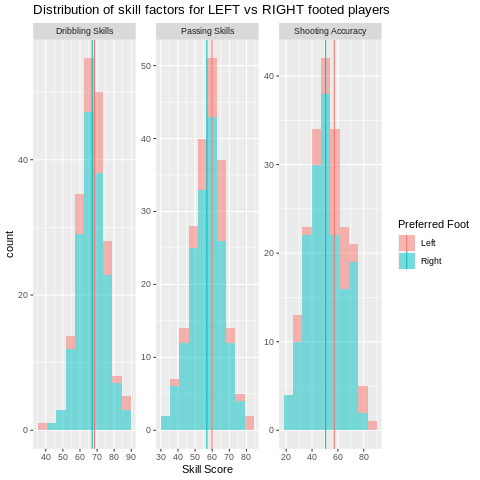

In [ ]:
#plot of players
%%R
stats_data_parsed = single_sample_fifa |>
              mutate(shooting_accuracy = skill_fk_accuracy,
                     dribbling_skills = skill_dribbling,
                     passing_skills = passing) |>
              select(preferred_foot, shooting_accuracy, dribbling_skills, passing_skills) |>
              pivot_longer(cols=c(-replicate, -preferred_foot), names_to = "stat", values_to = "values")
mean_data_parsed = single_sample_fifa |> group_by(preferred_foot) |>
              summarize(shooting_accuracy = mean(skill_fk_accuracy),
                     dribbling_skills = mean(skill_dribbling),
                     passing_skills = mean(passing)) |>
              select(preferred_foot, shooting_accuracy, dribbling_skills, passing_skills) |>
              pivot_longer(cols=c(-preferred_foot), names_to = "stat", values_to = "values")
stats_plot <- stats_data_parsed |>
              ggplot() +
              geom_histogram(aes(x = values, fill=preferred_foot), bins = 10, alpha = 0.5) +
              geom_vline(aes(xintercept = values, colour = preferred_foot), data = mean_data_parsed |> group_by(stat)) +
               facet_wrap(vars(stat), scales = "free", labeller = as_labeller(c(dribbling_skills = "Dribbling Skills", shooting_accuracy = "Shooting Accuracy", passing_skills = "Passing Skills"))) +
              labs(x = "Skill Score", fill = "Preferred Foot", colour = "Preferred Foot", title = "Distribution of skill factors for LEFT vs RIGHT footed players")


stats_plot

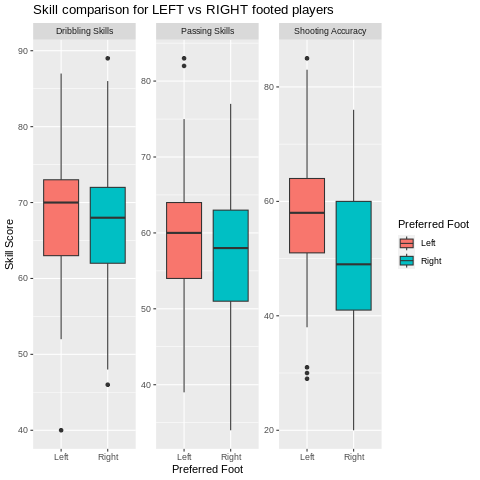

In [ ]:
%%R
stats_boxplot <- stats_data_parsed |>
              ggplot() +
              geom_boxplot(aes(x = preferred_foot, y=values, fill = preferred_foot)) +
              facet_wrap(vars(stat), scales = "free", labeller = as_labeller(c(dribbling_skills = "Dribbling Skills", shooting_accuracy = "Shooting Accuracy", passing_skills = "Passing Skills"))) +
              labs(x = "Preferred Foot", y = "Skill Score", fill = "Preferred Foot", title = "Skill comparison for LEFT vs RIGHT footed players")
stats_boxplot

The above plots help visualize the point estimate that we will use to make the conclusion to our inferential question about performances of left-footed and right-footed players.

Seeing the skills of left-footed and right-footed players roughly overlap in the histogram suggests that the difference in skill factors between the ```preferred_foot``` are not clear on a visible scale, however we do see the average of the left-foot skill score being consistently higher across the different skillsets by a small amount.

The non-overlapping part in each of the histograms allows us to assume that the dominant foot of players DOES affect their performance, but we need more evidence to determine whether it is a significant difference.

In order to verify this assumption, we need more evidence to either support or reject the claim. It is also wise to take into account the difference in number of observations in left and right foot players.

The boxplot also shows that left players have a higher median but we cannot confidently conclude that majority of left-footed players are better due to the spread.

<h2> 3. Methods: Plan </h2>



The report of the preliminary results is trustworthy as the sample is taken randomly, with an effective size (> 30 for the CLT assumptions to be satisfied) and representative of the population with proportional number of left-footed and right-footed soccer players. Hence, the analysis of the sample, as well as its visualization are good estimates that there could be a correlation between ```preferred_foot``` and the performances of each player.

However, the preliminary results are not reliable enough to support the claim. While the sample is representative and could possibly make a plausible estimation, we have no evidence how much standard error and sampling variation the population distribution has. Hence, there is a decent chance that the 200 observations in the sample could have many outliers that deviates from the parameter. Moreover, in real life scenarios, the stakeholder ideally would need extremely reliable values derived from the inferences that we are making. Hence, giving them a single estimator would not be ideal. From the preliminary results, we have not supported our estimation with confidence interval or hypothesis testing to see if the differences between left and right footed players' performances are truly different. Therefore, we would need to present a RANGE of values along with tests.

To overcome this issue, our solution is as follows:
**Plan:**
1. Use bootstrapping to resample from the original sample to create 3 different bootstrap distribution of the **mean** difference between each of the 3 skill sets: passing, shooting and dribbling abilities which indicate the ideal strengths as an attacker.

  **Asymptotics/CLT Method:** We will use both Bootstrapping from resamples and the CLT method to create a confidence interval, compare and contrast their charactersitics and produce plausible range of values of mean differences of
```skill_dribbling ```,
```passing```,
```skill_fk_accuracy```
for left and right footed players using CI. We will also generalize limitations & advantages for each methods.

2. From the bootstraps, we will create 3 confidence intervals for each distributions so that we do not present a single estimate for a stakeholder but a plausible range of values with varying degrees of confidence.

3. Compare and contrast the confidence intervals from each methods and list some key properties of each methods.

3. Conduct two-sample T-test for each skill mean differences as well as one-sample t-test for standard deviation for left-foot and right-foot players to see if our claim regarding ```preferred_foot``` affecting the players' performances hold true. We will set the significance level at 0.05. This threshold is stringent enough to limit the probability of a Type I error (falsely claiming a significant difference when there is none) to a reasonably low level, thus enhancing the reliability of our conclusions. A p-value lower than 0.05 will be required to reject the null hypothesis in favour of the alternative, suggesting a statistically significant difference between the performances of left and right footed players. This is to practically ensure that the differences are statistically significant and can occur. Specifically, since we are conducting this report in a **realistic** situation and assuming that we do not know the sigma, we can use the two-sample t-test with a decent level of degree of freedom to test that the mean differences exist. We do not need to rely completely on CLT since our distribution is normal.

4. Plot visualizations for the 3 hypothesis tests above and summarize the statistics to derive a meaningful conclusion. Finally, list which steps clearly show the differences between left-footed and right-footed players.


---



<h3> Expected Findings </h3>
Through this report, we expect to find that the skill difference between left-footed and right-footed players really exists.
With the sport being mostly dominated by right-footed players, left-footed players have been difficult to play against for defenders. Hence, left-footed players usually have very high passing and playmaking skills as attackers. There are many right-footed players however, who are consistent at scoring such as Ronaldo. These facts gives us a good expectations of the differences between the explanatory variable and is hoped to be proven. We also expect to create well-constructed visualizations of confidence intervals, hypothesis testing as well as other outputs from different tests that clearly come to a consensus towards the inferential question.

<h3> Impact </h3>
Finding the answer to the inferential question regarding the skills and behavioural patterns of players will have a signficant impact towards the competitive Soccer community. Soccer games are analyzed and defenders are told to strategically mark and defend the attackers. Hence, finding that left-footed players have strong passing skills while right-footed players have strong dribbling skills compared to left-footed players with sufficient evidence would help the coaches in the Soccer community prepare to defend such attackers (e.g. IF left-footed players are found to be very good at passing, the coach could set up 2 defenders to merge against the left-footed players to prevent passes) which would make the game even more competitive and help develop creative strategies for the teams.

<h3> Future Questions </h3>
There could be infinitely many questions regarding the analysis of playing styles.
Further questions can be regarding:


1. Do the differences the playing styles of between left-footed vs right-footed defenders exist?
2. Do age, height, weight or even nationality affect the overall ranking across all positions?
3. Does taking more samples change the results? What if there were equal proportions of left-footed and right-footed players? Would the results differ in terms of CI and p-value?

Moreover, there could be further research questions to see if other variables such as age, height, weight or even nationality affects playing styles.

## Bootstrap Distributions of Differences in Average Stats

In [ ]:
%%R

bst_samples_passing <- single_sample_fifa |>
                specify(formula = passing ~ preferred_foot) |>
                generate(reps = 2000, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Right", "Left"))

bst_samples_dribbling <- single_sample_fifa |>
                specify(formula = skill_dribbling ~ preferred_foot) |>
                generate(reps = 2000, type = "bootstrap") |>
                calculate(stat = "diff in means", order = c("Right", "Left"))

bst_samples_shooting <- single_sample_fifa |>
            specify(formula = skill_fk_accuracy ~ preferred_foot) |>
            generate(reps = 2000, type = "bootstrap") |>
            calculate(stat = "diff in means", order = c("Right", "Left"))


# bootstrap_stats_per_foot <- bst_samples %>%
#     group_by(replicate...1, preferred_foot) %>%
#     summarise(avg_dribbling = mean(skill_dribbling),
#            avg_passing = mean(passing),
#            avg_fk_accuracy = mean(skill_fk_accuracy)) %>%
#     pivot_longer(cols=c(-preferred_foot, -replicate...1), names_to = "skill_stats", values_to = "Value") %>%
#     pivot_wider(names_from = preferred_foot, values_from = c(Value))

# mean_LR_diff <- bootstrap_stats_per_foot %>%
#     mutate(lr_diff = Right - Left) %>%
#     group_by(skill_stats) %>%
#     mutate(mean_lr_diff = mean(Right)-mean(Left)) %>%
#     select(-Left, -Right)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


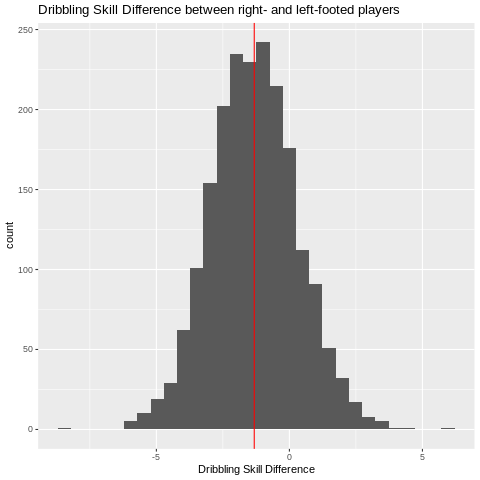

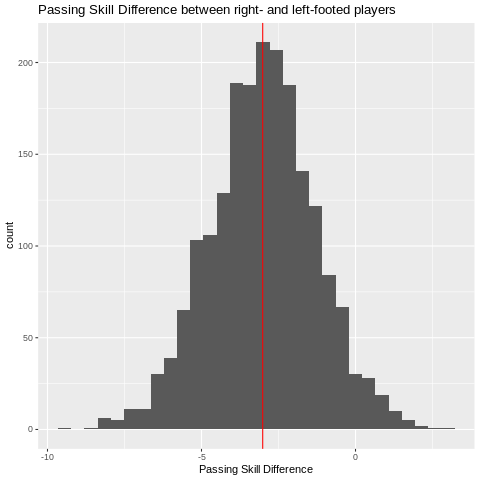

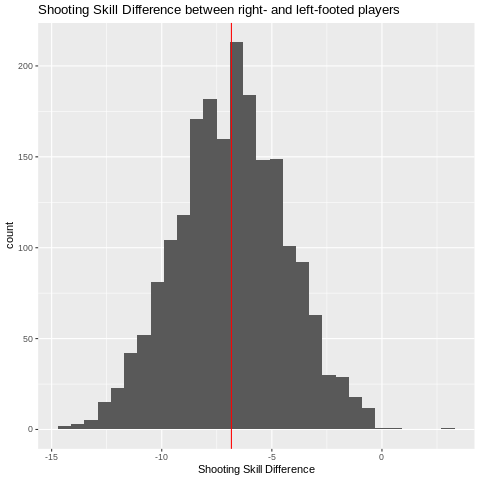

In [ ]:

%%R

# Mean Left-Right Difference PLOTS

LR_diff_dribbling <- bst_samples_dribbling %>%
    ggplot() +
    geom_histogram(aes(x = stat)) +
    geom_vline(xintercept = mean(bst_samples_dribbling$stat), color = "red") +
    labs(x = "Dribbling Skill Difference", title = "Dribbling Skill Difference between right- and left-footed players")
print(LR_diff_dribbling)

LR_diff_passing <- bst_samples_passing %>%
    ggplot() +
    geom_histogram(aes(x = stat)) +
    geom_vline(xintercept = mean(bst_samples_passing$stat), color = "red") +
    labs(x = "Passing Skill Difference", title = "Passing Skill Difference between right- and left-footed players")
print(LR_diff_passing)

LR_diff_shooting <- bst_samples_shooting %>%
    ggplot() +
    geom_histogram(aes(x = stat)) +
    geom_vline(xintercept = mean(bst_samples_shooting$stat), color = "red") +
    labs(x = "Shooting Skill Difference", title = "Shooting Skill Difference between right- and left-footed players")
print(LR_diff_shooting)

In [ ]:
%%R
#Asymptotics

clt_sample <- diff_left_right |>
              pivot_wider(names_from = "Skill Statistics", values_from=c(Left, Right)) |>
              mutate(mean_passing_diff = Right_avg_passing - Left_avg_passing,
                     mean_shooting_diff = Right_avg_shooting - Left_avg_shooting,
                     mean_dribbling_diff = Right_avg_dribbling - Left_avg_dribbling,
                     se_passing = sqrt(Left_sd_passing^2/Left_n + Right_sd_passing^2/Right_n),
                     se_dribbling = sqrt(Left_sd_dribbling^2/Left_n + Right_sd_dribbling^2/Right_n),
                     se_shooting = sqrt(Left_sd_shooting^2/Left_n + Right_sd_shooting^2/Right_n)
                     ) |>
              select(mean_passing_diff, mean_shooting_diff,mean_dribbling_diff,se_passing,
                     se_dribbling, se_shooting)


clt_sample

clt_passing <- tibble(x = seq(clt_sample$mean_passing_diff - 4 * clt_sample$se_passing,
                                        clt_sample$mean_passing_diff + 4 * clt_sample$se_passing,
                                        0.0001),
                                density = dnorm(x, clt_sample$mean_passing_diff, clt_sample$se_passing))


clt_shooting <- tibble(x = seq(clt_sample$mean_shooting_diff - 4 * clt_sample$se_shooting,
                                        clt_sample$mean_shooting_diff + 4 * clt_sample$se_shooting,
                                        0.0001),
                                density = dnorm(x, clt_sample$mean_shooting_diff, clt_sample$se_shooting))

clt_dribbling <- tibble(x = seq(clt_sample$mean_dribbling_diff - 4 * clt_sample$se_dribbling,
                                        clt_sample$mean_dribbling_diff + 4 * clt_sample$se_dribbling,
                                        0.0001),
                                density = dnorm(x, clt_sample$mean_dribbling_diff, clt_sample$se_dribbling))

In [ ]:
%%R

clt_vs_bootstrap_passing <-
    bst_samples_passing %>%
    ggplot() +
    geom_histogram(aes(x = stat, y = ..density..),bins = 20, color="white") +
    xlab("Mean differences in Passing skills") +
    ggtitle("CLT vs Bootstrap distribution for mean differences in Passing skills (n=200)") +
    geom_line(data = clt_passing, aes(x, density), color = "red", lwd = 2)

In [ ]:
%%R

clt_vs_bootstrap_dribbling <-
    bst_samples_dribbling %>%
    ggplot() +
    geom_histogram(aes(x = stat, y = ..density..),bins = 20, color="white") +
    xlab("Mean differences in Dribbling skills") +
    ggtitle("CLT vs Bootstrap distribution for mean differences in Dribbling skills (n=200)") +
    geom_line(data = clt_dribbling, aes(x, density), color = "red", lwd = 2)

In [ ]:
%%R

clt_vs_bootstrap_shooting <-
    bst_samples_shooting %>%
    ggplot() +
    geom_histogram(aes(x = stat, y = ..density..),bins = 20, color="white") +
    xlab("Mean differences in Shooting skills") +
    ggtitle("CLT vs Bootstrap distribution for mean differences in Shooting skills (n=200)") +
    geom_line(data = clt_shooting, aes(x, density), color = "red", lwd = 2)

In [ ]:
%%R
#CI for CLT and Bootstrap

ci_passing <- bst_samples_passing |>
              get_ci(level = 0.95, type = "percentile")

ci_shooting <- bst_samples_shooting |>
              get_ci(level = 0.95, type = "percentile")

ci_dribbling <- bst_samples_dribbling |>
              get_ci(level = 0.95, type = "percentile")

In [ ]:
%%R
ci_diff_in_passing <-
    visualize(bst_samples_passing) +
    shade_confidence_interval(endpoints = ci_passing) +
    theme(text = element_text(size = 20)) +
    labs(x = "Difference in Means", y = "Count", title = "\nPassing Skills") +
    theme_bw() +
    theme(axis.text=element_text(size=14),
          axis.title=element_text(size=17),
          plot.title = element_text(size=20))

In [ ]:
%%R
ci_diff_in_shooting <-
    visualize(bst_samples_shooting) +
    shade_confidence_interval(endpoints = ci_shooting) +
    theme(text = element_text(size = 20)) +
    labs(x = "Difference in Means", y = "Count", title = "\nShooting Accuracy/Skills") +
    theme_bw() +
    theme(axis.text=element_text(size=14),
          axis.title=element_text(size=17),
          plot.title = element_text(size=20))

In [ ]:
%%R
ci_diff_in_dribbling <-
    visualize(bst_samples_dribbling) +
    shade_confidence_interval(endpoints = ci_dribbling) +
    theme(text = element_text(size = 20)) +
    labs(x = "Difference in Means", y = "Count", title = "\nDribbling Skills") +
    theme_bw() +
    theme(axis.text=element_text(size=14),
          axis.title=element_text(size=17),
          plot.title = element_text(size=20))

In [ ]:
%%R
#CI for CLT

ci_clt <- clt_sample |>
          mutate(lower_ci_passing = mean_passing_diff - qnorm(0.975)*se_passing,
                 upper_ci_passing = mean_passing_diff + qnorm(0.975)*se_passing,
                 lower_ci_shooting = mean_shooting_diff - qnorm(0.975)*se_shooting,
                 upper_ci_shooting = mean_shooting_diff + qnorm(0.975)*se_shooting,
                 lower_ci_dribbling = mean_dribbling_diff - qnorm(0.975)*se_dribbling,
                 upper_ci_dribbling = mean_dribbling_diff + qnorm(0.975)*se_dribbling,
                 ) |>
          select(lower_ci_passing, upper_ci_passing, lower_ci_shooting,
                                upper_ci_shooting, lower_ci_dribbling, upper_ci_dribbling) |>
          pivot_longer(cols = c(lower_ci_passing, upper_ci_passing, lower_ci_shooting,
                                upper_ci_shooting, lower_ci_dribbling, upper_ci_dribbling), names_to = "Mean Skill Diff CI", values_to = "CLT")
ci_clt

# A tibble: 6 × 2
  `Mean Skill Diff CI`     CLT
  <chr>                  <dbl>
1 lower_ci_passing      -6.38 
2 upper_ci_passing       0.368
3 lower_ci_shooting    -11.6  
4 upper_ci_shooting     -1.85 
5 lower_ci_dribbling    -4.45 
6 upper_ci_dribbling     1.84 


In [ ]:
%%R
#comparison
bootstrap_ci <- rbind(ci_passing, ci_shooting, ci_dribbling) |>
                pivot_longer(cols = c(lower_ci, upper_ci), names_to = "Mean Skill Diff CI", values_to = "Bootstrap") |>
                select(c("Bootstrap"))

cbind(ci_clt, bootstrap_ci)



  Mean Skill Diff CI         CLT   Bootstrap
1   lower_ci_passing  -6.3848253  -6.4799683
2   upper_ci_passing   0.3679127   0.4285887
3  lower_ci_shooting -11.6043112 -11.6890253
4  upper_ci_shooting  -1.8515004  -1.7809035
5 lower_ci_dribbling  -4.4476102  -4.4208754
6 upper_ci_dribbling   1.8354397   2.0075316


Given these confidence intervals, only when it comes to shooting skill does the preferred foot really make a significant difference. We can say that because for a null hypothesis where the expected mean difference is 0, and the confidence interval for shooting is between -11.6 and -1.85, which means  the mean difference couldn't possibly be 0 within this confidence interval. In this case, since the difference is negative the results show that on average left-footed players have a higher success rate at shooting than right-footed players do (since the difference is calculated by right-left). The other two skills, passing and dribbling, are less likely to be impacted by which foot the player prefers, since the confidence interval overlaps with the expected mean difference under the null hypothesis, 0. Passing, however, just barely reaches zero, so more tests, such the t-test need to be done to determine whether there is a significant difference in success with different preferred feet at our confidence level.

In [ ]:
%%R
#two-sample t-test

left_players <- single_sample_fifa |>
                filter(preferred_foot == "Left")

right_players <- single_sample_fifa |>
                 filter(preferred_foot == "Right")

t_test <- function(a,b,c) {
    return (
        broom::tidy(t.test(x = a,
               y = b,
               alternative = "two.sided",
               paired = FALSE)) |>
        mutate(response = c)
    )
}

t_test_results <- rbind(t_test(right_players$passing, left_players$passing, "Passing Skills Difference"),
                        t_test(right_players$skill_dribbling, left_players$skill_dribbling, "Dribbling Skills Difference"),
                        t_test(right_players$skill_fk_accuracy, left_players$skill_fk_accuracy, "Shooting Accuracy Difference")) |>
                  select(response, estimate, p.value, conf.low, conf.high)

t_test_results

# A tibble: 3 × 5
  response                     estimate p.value conf.low conf.high
  <chr>                           <dbl>   <dbl>    <dbl>     <dbl>
1 Passing Skills Difference       -3.01 0.0867     -6.47     0.450
2 Dribbling Skills Difference     -1.31 0.419      -4.53     1.92 
3 Shooting Accuracy Difference    -6.73 0.00921   -11.7     -1.74 


In [ ]:
%%R
#Visualizing two-sample t-test

#test statistics

passing_obs_diff <- mean(bst_samples_passing$stat)

dribbling_obs_diff <- mean(bst_samples_dribbling$stat)

shooting_obs_diff <- mean(bst_samples_shooting$stat)

In [ ]:
%%R
#Create null distributions

null_model_passing <-
   single_sample_fifa %>%
   specify(formula = passing ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_model_dribbling <-
   single_sample_fifa %>%
   specify(formula = skill_dribbling ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_model_shooting <-
   single_sample_fifa %>%
   specify(formula = skill_fk_accuracy ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

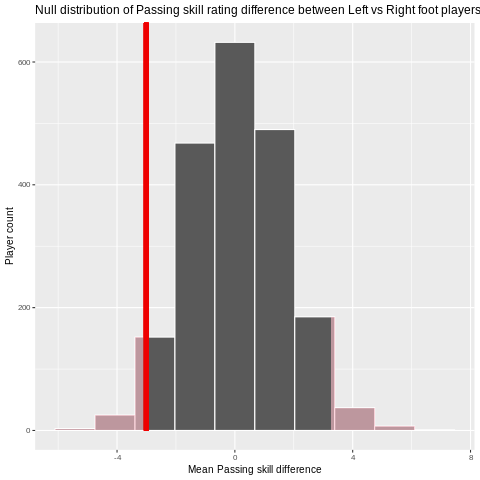

In [ ]:
%%R
null_passing_vis <- null_model_passing |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = passing_obs_diff, direction = "both") +
                    xlab("Mean Passing skill difference") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Passing skill rating difference between Left vs Right foot players") +
                    theme(text = element_text(size=10))

null_passing_vis

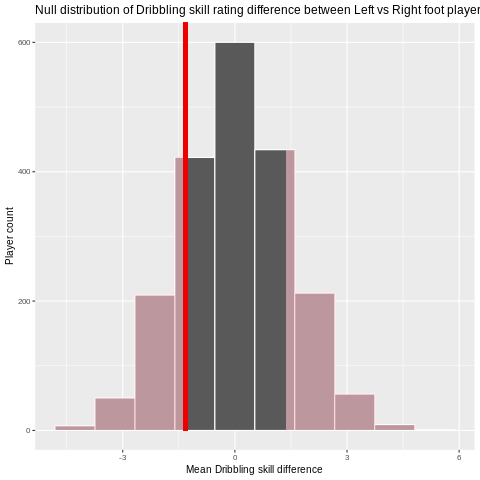

In [ ]:
%%R
null_dribbling_vis <- null_model_dribbling |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = dribbling_obs_diff, direction = "both") +
                    xlab("Mean Dribbling skill difference") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Dribbling skill rating difference between Left vs Right foot players") +
                    theme(text = element_text(size=10))

null_dribbling_vis

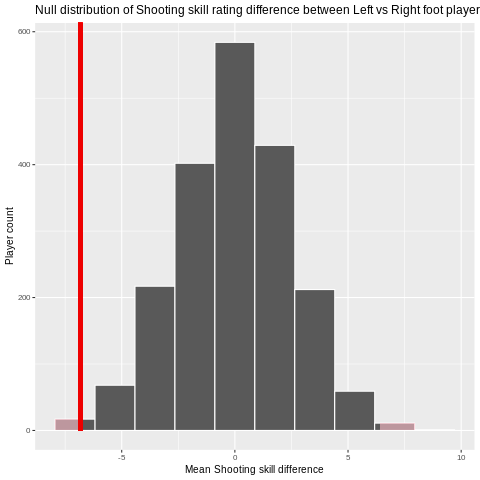

In [ ]:
%%R
null_shooting_vis <- null_model_shooting |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = shooting_obs_diff, direction = "both") +
                    xlab("Mean Shooting skill difference") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Shooting skill rating difference between Left vs Right foot players") +
                    theme(text = element_text(size=10))

null_shooting_vis

The only p-value that falls below our chosen significance level (a = 0.05) is that of mean shooting skill difference. This means that out of all three skills, only for shooting does the preferred foot of the player have a significant impact on skill. As a result, we would reject the null hypothesis for mean shooting skill difference as it was not equal, and conclude that the alternative hypothesis is true. In this case, we could be making a type I error. For the other two skills, dribbling and passing, we accept the null hypothesis and conclude that there is no significant difference between the skill level of right- and left-footed players because the p-value is greater than the sigificance level. In this case, we might be making a type II error.

# Test Using Each Individual Position

**Dribbling**

In [ ]:
%%R
left_players <- single_sample_fifa |>
                filter(preferred_foot == "Left")

right_players <- single_sample_fifa |>
                 filter(preferred_foot == "Right")

left_dribbling = left_players |> group_by(team_position) |> summarize(sample_mean_l = mean(skill_dribbling), std_l = sd(skill_dribbling), n_l = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
right_dribbling = right_players |> group_by(team_position) |> summarize(sample_mean_r = mean(skill_dribbling), std_r = sd(skill_dribbling), n_r = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
test_stats = merge(left_dribbling, right_dribbling)  |> mutate(x_bar = sample_mean_r - sample_mean_l, z = x_bar / sqrt(std_r^2 / n_r + std_l^2 / n_l)) |> select(team_position, x_bar, z)
test_stats <- test_stats |> mutate(p = pnorm(abs(z), lower.tail = FALSE))
test_stats

  team_position     x_bar          z           p
1            LW  3.575251  1.6911097 0.045407923
2            RW -6.219828 -2.6631265 0.003870915
3            ST  1.544318  0.6239325 0.266335942


In [ ]:
%%R
test_stats
null_model_dribble_LW <-
   single_sample_fifa %>% filter(team_position == "LW") |>
   specify(formula = skill_dribbling ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_model_dribble_RW <-
   single_sample_fifa %>% filter(team_position == "RW") |>
   specify(formula = skill_dribbling ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

  null_model_dribble_ST <-
   single_sample_fifa %>% filter(team_position == "ST") |>
   specify(formula = skill_dribbling ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_dribbling_LW <- null_model_dribble_LW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "LW"))$x_bar, direction = "both") +
                    xlab("Mean Dribbling skill difference in LW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Dribbling skill rating difference between Left vs Right foot LW players") +
                    theme(text = element_text(size=10))

null_dribbling_RW <- null_model_dribble_RW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "RW"))$x_bar, direction = "both") +
                    xlab("Mean Dribbling skill difference in RW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Dribbling skill rating difference between Left vs Right foot RW players") +
                    theme(text = element_text(size=10))

null_dribbling_ST <- null_model_dribble_ST |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "ST"))$x_bar, direction = "both") +
                    xlab("Mean Dribbling skill difference in ST Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Dribbling skill rating difference between Left vs Right foot ST players") +
                    theme(text = element_text(size=10))

  object 'test_stats' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'test_stats' not found


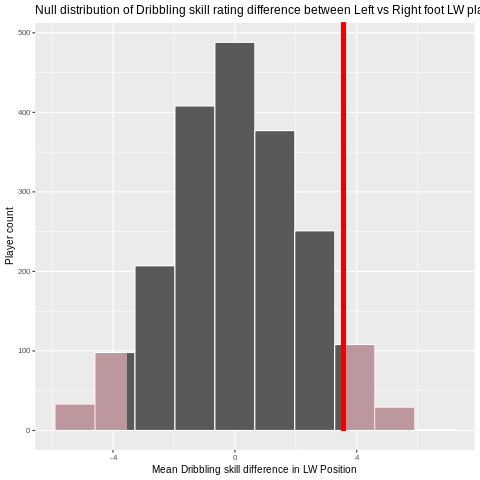

In [ ]:
%%R
null_dribbling_LW

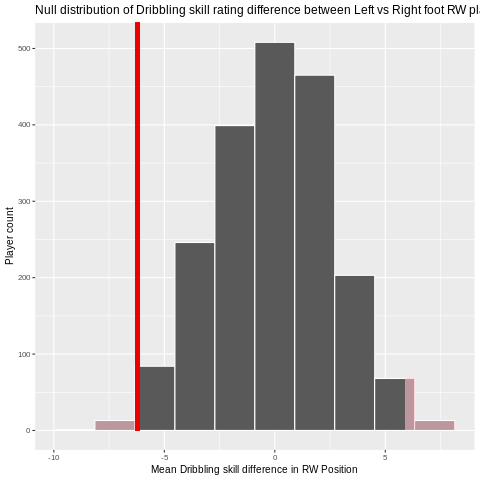

In [ ]:
%%R
null_dribbling_RW

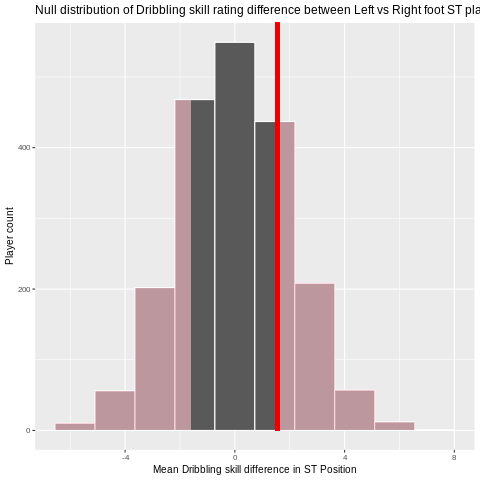

In [ ]:
%%R
null_dribbling_ST

**Passing**

In [ ]:
%%R
left_passing = left_players |> group_by(team_position) |> summarize(sample_mean_l = mean(passing), std_l = sd(passing), n_l = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
right_passing = right_players |> group_by(team_position) |> summarize(sample_mean_r = mean(passing), std_r = sd(passing), n_r = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
test_stats = merge(left_passing, right_passing)  |> mutate(x_bar = sample_mean_r - sample_mean_l, z = x_bar / sqrt(std_r^2 / n_r + std_l^2 / n_l)) |> select(team_position, x_bar, z)
test_stats <- test_stats |> mutate(p = pnorm(abs(z), lower.tail = FALSE))
test_stats

  object 'left_players' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'left_players' not found


In [ ]:
%%R
test_stats
null_model_passing_LW <-
   single_sample_fifa %>% filter(team_position == "LW") |>
   specify(formula = passing ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_model_passing_RW <-
   single_sample_fifa %>% filter(team_position == "RW") |>
   specify(formula = passing ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

  null_model_passing_ST <-
   single_sample_fifa %>% filter(team_position == "ST") |>
   specify(formula = passing ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_passing_LW <- null_model_passing_LW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "LW"))$x_bar, direction = "both") +
                    xlab("Mean Passing skill difference in LW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Passing skill rating difference between Left vs Right foot LW players") +
                    theme(text = element_text(size=10))

null_passing_RW <- null_model_passing_RW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "RW"))$x_bar, direction = "both") +
                    xlab("Mean Passing skill difference in RW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Passing skill rating difference between Left vs Right foot RW players") +
                    theme(text = element_text(size=10))

null_passing_ST <- null_model_passing_ST |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "ST"))$x_bar, direction = "both") +
                    xlab("Mean Passing skill difference in ST Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Passing skill rating difference between Left vs Right foot ST players") +
                    theme(text = element_text(size=10))

  object 'test_stats' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'test_stats' not found


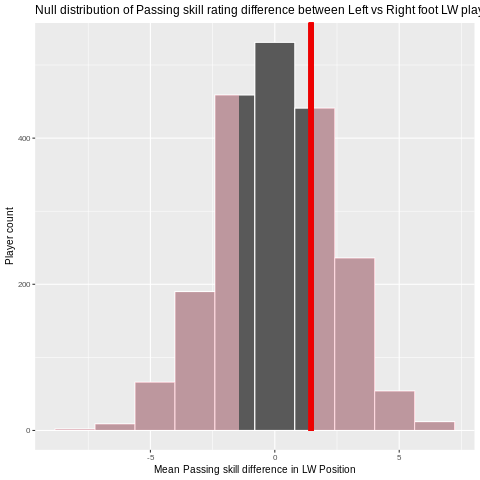

In [ ]:
%%R
null_passing_LW

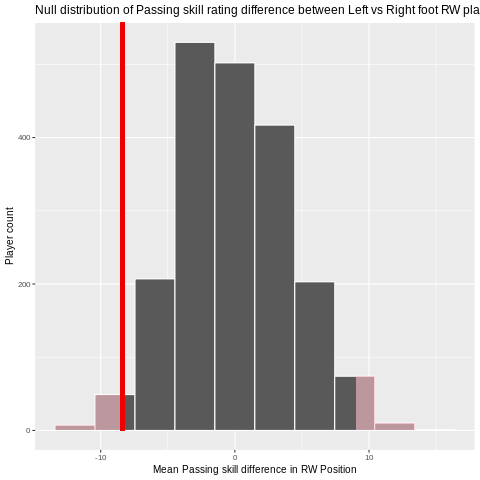

In [ ]:
%%R
null_passing_RW

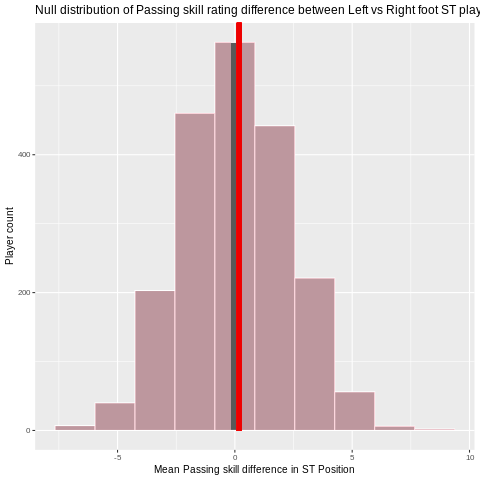

In [ ]:
%%R
null_passing_ST

**Shooting**

In [ ]:
%%R
left_shooting = left_players |> group_by(team_position) |> summarize(sample_mean_l = mean(skill_fk_accuracy), std_l = sd(skill_fk_accuracy), n_l = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
right_shooting = right_players |> group_by(team_position) |> summarize(sample_mean_r = mean(skill_fk_accuracy), std_r = sd(skill_fk_accuracy), n_r = n()) |> filter(team_position %in% c("LW", "RW", "ST"))
test_stats = merge(left_passing, right_passing)  |> mutate(x_bar = sample_mean_r - sample_mean_l, z = x_bar / sqrt(std_r^2 / n_r + std_l^2 / n_l)) |> select(team_position, x_bar, z)
test_stats <- test_stats |> mutate(p = pnorm(abs(z), lower.tail = FALSE))
test_stats

  team_position      x_bar           z          p
1            LW  1.4581940  0.65692200 0.25561553
2            RW -8.3577586 -2.11324620 0.01728985
3            ST  0.1784091  0.07360522 0.47066226


In [ ]:
%%R
test_stats
null_model_shooting_LW <-
   single_sample_fifa %>% filter(team_position == "LW") |>
   specify(formula = skill_fk_accuracy ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_model_shooting_RW <-
   single_sample_fifa %>% filter(team_position == "RW") |>
   specify(formula = skill_fk_accuracy ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

  null_model_shooting_ST <-
   single_sample_fifa %>% filter(team_position == "ST") |>
   specify(formula = skill_fk_accuracy ~ preferred_foot) %>%
   hypothesise(null = "independence", mu = 0) %>%
   generate(type = "permute", reps = 2000) %>%
   calculate(stat = "diff in means", order = c("Right", "Left"))

null_shooting_LW <- null_model_shooting_LW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "LW"))$x_bar, direction = "both") +
                    xlab("Mean Shooting skill difference in LW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Shooting skill rating difference between Left vs Right foot LW players") +
                    theme(text = element_text(size=10))

null_shooting_RW <- null_model_shooting_RW |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "RW"))$x_bar, direction = "both") +
                    xlab("Mean Shooting skill difference in RW Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Shooting skill rating difference between Left vs Right foot RW players") +
                    theme(text = element_text(size=10))

null_shooting_ST <- null_model_shooting_ST |>
                    visualize(bins = 10) +
                    shade_p_value(obs_stat = (test_stats |> filter(team_position == "ST"))$x_bar, direction = "both") +
                    xlab("Mean Shooting skill difference in ST Position") +
                    ylab("Player count") +
                    ggtitle("Null distribution of Shooting skill rating difference between Left vs Right foot ST players") +
                    theme(text = element_text(size=10))

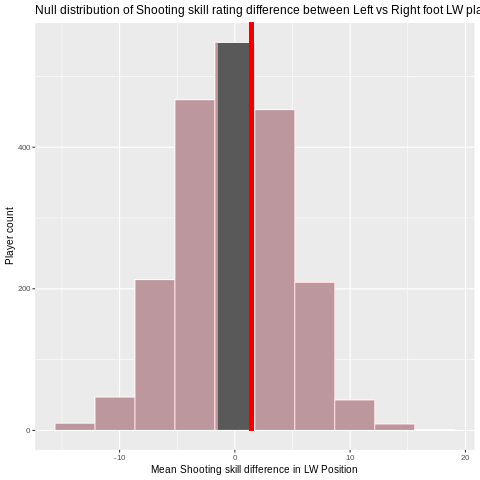

In [ ]:
%%R
null_shooting_LW

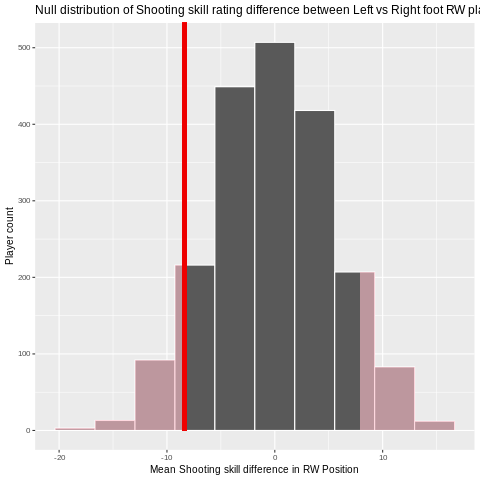

In [ ]:
%%R
null_shooting_RW

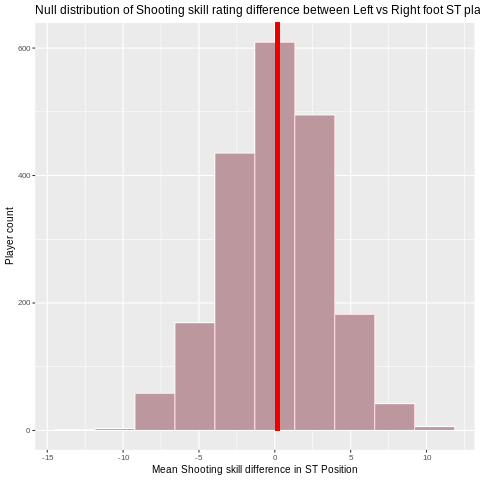

In [ ]:
%%R
null_shooting_ST

<h2> 4. References </h2>


*   **ESPN Football**, Tor-Kristian Karlsen: *Why does every club want a left-footed centre-back, and who is the best around?* (Oct 21, 2022) https://www.espn.co.uk/football/story/_/id/37633113/why-does-every-club-want-sign-left-footed-centre-back .

*  **Medium**, Harun Ahmetbeyoglu: *Are left-footed footballers earning more? And they are more valuable than right-footed footballers? Investigation of this popular myth and bias.* (July 31, 2022) https://medium.com/@harun.ahmetbeyoglu/are-left-footed-footballers-earning-more-fde9b932912f .


* **SoccerNovo**, *Left Footed Soccer Players: Is There an Advantage?* (2020) https://soccernovo.com/left-footed-soccer-players/ .




